Initial image count: 2167
Checking 2167 images for corruption...
Final image count: 2167
Classes: ['closedFist', 'fingerCircle', 'fingerSymbols', 'multiFingerBend', 'openPalm', 'semiOpenFist', 'semiOpenPalm', 'singleFingerBend']
Number of classes: 8


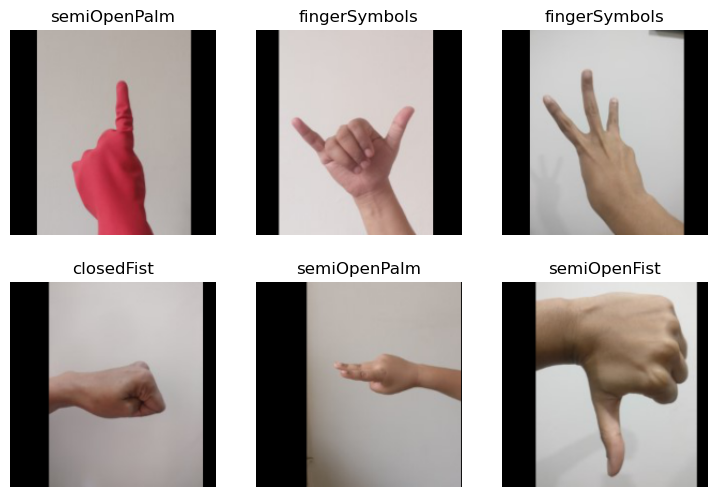

Image mode: RGB


epoch,train_loss,valid_loss,error_rate,time
0,2.930196,1.803147,0.621247,00:06


epoch,train_loss,valid_loss,error_rate,time
0,2.044454,1.305705,0.448037,00:07
1,1.524521,1.089641,0.348730,00:07
2,1.174147,1.092631,0.355658,00:07


Prediction: fingerCircle
Confidence: 0.9965


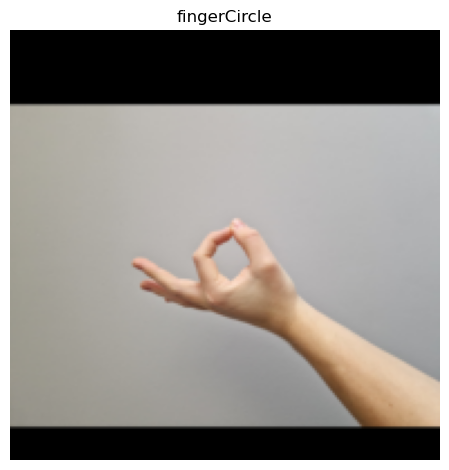

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from fastai.vision.all import *
from PIL import Image
from fastai.vision.utils import show_image

# Clear any cached GPU memory
torch.cuda.empty_cache()

# Remove corrupt or non-finite images
def clean_images(img_paths):
    for img_path in img_paths:
        try:
            img = PILImage.create(img_path)
            tensor = ToTensor()(img)
            if not torch.isfinite(tensor).all():
                print(f"Bad tensor: {img_path}")
                img_path.unlink()
        except Exception as e:
            print(f"Corrupt image: {img_path}, Error: {e}")
            img_path.unlink()

# def main():
path = Path('hand_gestures/images')

print("Initial image count:", len(get_image_files(path)))

# Clean up images
all_imgs = get_image_files(path)
print(f"Checking {len(all_imgs)} images for corruption...")
clean_images(all_imgs)
print("Final image count:", len(get_image_files(path)))

# Create DataLoaders
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=1),
    get_y=parent_label,
    item_tfms=[Resize(192, method='pad', pad_mode='zeros')]
)
dls = dblock.dataloaders(path, bs=32)

print("Classes:", dls.vocab)
print("Number of classes:", dls.c)

# Show batch
dls.show_batch(max_n=6)
plt.show()

# Display image mode
test_img_path = 'do_rozpoznania/20250406_135604.jpg'
test_img = PILImage.create(test_img_path)
print("Image mode:", test_img.mode)

# Train model
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.lr_find()
learn.fine_tune(3, base_lr=1e-3)

# Resize the predicted image to 192x192 with padding
resize = Resize(192, method='pad', pad_mode='zeros')
resized_img = resize(test_img)

# Predict the label for the resized image
pred_label, _, probs = learn.predict(PILImage.create(resized_img))
print(f"Prediction: {pred_label}")
print(f"Confidence: {probs.max():.4f}")

# Show predicted image with label
plt.close('all')  # Clear previous plots, esp. from lr_find()
plt.imshow(resized_img)
plt.title(pred_label)
plt.axis('off')
plt.tight_layout()
plt.show()

# if __name__ == '__main__':
#     main()

Prediction: semiOpenFist
Confidence: 0.9149


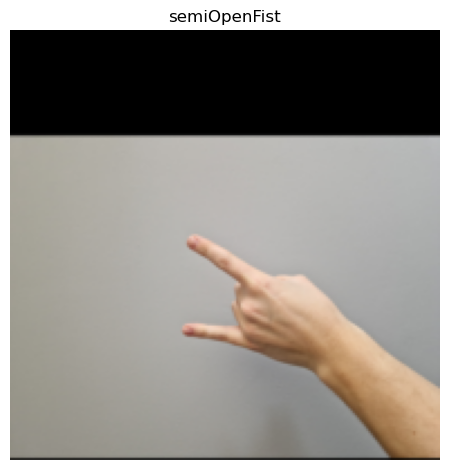

In [19]:
test_img_path = 'do_rozpoznania/20250406_135614.jpg'
test_img = PILImage.create(test_img_path)

# Resize the predicted image to 192x192 with padding
resized_img = resize(test_img)

pred_label, _, probs = learn.predict(PILImage.create(resized_img))
print(f"Prediction: {pred_label}")
print(f"Confidence: {probs.max():.4f}")

# Show predicted image with label
plt.close('all')  # Clear previous plots, esp. from lr_find()
plt.imshow(resized_img)
plt.title(pred_label)
plt.axis('off')
plt.tight_layout()
plt.show()

Prediction: semiOpenPalm
Confidence: 0.4708


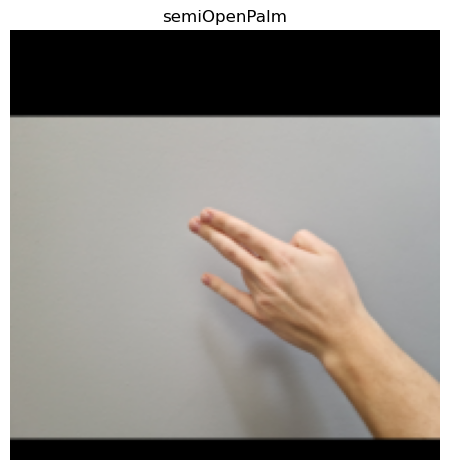

In [20]:
test_img_path = 'do_rozpoznania/20250406_135846.jpg'
test_img = PILImage.create(test_img_path)

# Resize the predicted image to 192x192 with padding
resized_img = resize(test_img)

pred_label, _, probs = learn.predict(PILImage.create(resized_img))
print(f"Prediction: {pred_label}")
print(f"Confidence: {probs.max():.4f}")

# Show predicted image with label
plt.close('all')  # Clear previous plots, esp. from lr_find()
plt.imshow(resized_img)
plt.title(pred_label)
plt.axis('off')
plt.tight_layout()
plt.show()